# Strider

Strider finds and ranks all paths that fulfill the query.

In [106]:
import json
import time

from cyjupyter import Cytoscape
import httpx
import matplotlib.pyplot as plt

from notebook_functions import reasonerGraphToCytoscape, knowledgeGraphToCytoscape


class Strider:
    def __init__(self):
        self.url = 'http://robokop.renci.org:5781'
    def ask(self, question):
        message = {'message': {'query_graph': question}}
        return self.send_message(message)
    def send_message(self, message, **kwargs):
        response = httpx.post(f'{self.url}/query', json=message, params=kwargs)
        assert response.status_code < 300
        pid = response.json()
        return pid
    def get_response(self, pid):
        response = httpx.get(f'{self.url}/results', params={'query_id': pid})
        assert response.status_code < 300
        return response.json()
    
strider = Strider()

In [107]:
query_graph = {
    "nodes": [
        {
            "id": "a",
            "type": "disease",
            "curie": "MONDO:0005015"
        },
        {
            "id": "b",
            "type": "gene"
        },
        {
            "id": "c",
            "type": "chemical_substance"
        }
    ],
    "edges": [
        {
            "id": "ab",
            "source_id": "a",
            "target_id": "b",
            "type": "gene_associated_with_condition",
        },
        {
            "id": "bc",
            "source_id": "c",
            "target_id": "b",
            "type": "decreases_activity_of"
        }
    ]
}
message = {"message": {"query_graph": query_graph}}
c = reasonerGraphToCytoscape(query_graph)
c['style'][0]['style']['width'] = '12em'
Cytoscape(
    data=c,
    visual_style=c["style"],
    layout_name='grid',
    layout={ "height": "200px"}
)

Cytoscape(data={'elements': {'nodes': [{'data': {'id': 'a', 'label': 'disease\n[MONDO:0005015]', 'curie': 'MON…

In [134]:
p = strider.send_message(message, support=False)
print(p)

2101e23c-eca6-44c1-93b2-c5ecafe86758


In [135]:
response = strider.get_response(p)
num_results = len(response['results'])
print(f'{num_results} results')

702 results


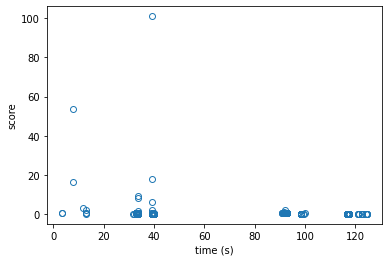

In [136]:
times = [result['timestamp'] for result in response['results']]
scores = [result['score'] for result in response['results']]
plt.plot(
    times, scores,
    'o', markerfacecolor='None'
)
plt.xlabel('time (s)')
plt.ylabel('score')
plt.show()

In [137]:
node_names = {
    knode['id']: knode['name']
    for knode in response['knowledge_graph']['nodes']
}
for result in response['results']:
    print(f"{result['timestamp']:6.2f}s ({result['score']:6.2f}): {[node_names[b['kg_id']] for b in result['node_bindings']]}")

  3.58s (  0.49): ['diabetes mellitus (disease)', 'AOC3', 'MOFEGILINE']
  3.59s (  0.49): ['diabetes mellitus (disease)', 'AOC3', 'METHYLHYDRAZINE']
  7.63s ( 16.46): ['diabetes mellitus (disease)', 'ABCC8', 'Repaglinide']
  7.85s ( 53.68): ['diabetes mellitus (disease)', 'ABCC8', 'tolbutamide']
 11.93s (  3.45): ['diabetes mellitus (disease)', 'ABCC8', 'mitiglinide']
 12.96s (  0.49): ['diabetes mellitus (disease)', 'AOC3', 'hydralazine']
 12.97s (  0.30): ['diabetes mellitus (disease)', 'GSK3A', 'trans-resveratrol']
 12.97s (  2.41): ['diabetes mellitus (disease)', 'ABCC8', 'chlorpropamide']
 12.98s (  0.94): ['diabetes mellitus (disease)', 'AOC3', 'PHENELZINE']
 31.72s (  0.30): ['diabetes mellitus (disease)', 'GSK3A', '']
 32.03s (  0.30): ['diabetes mellitus (disease)', 'GSK3A', 'CHEMBL322970']
 32.70s (  0.42): ['diabetes mellitus (disease)', 'GSK3A', 'CHIR-99021']
 32.73s (  0.49): ['diabetes mellitus (disease)', 'AOC3', 'CHEMBL1241428']
 32.74s (  0.49): ['diabetes mellitus (di